# bike insurance fraud detection system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
insurance_details = pd.read_csv('fraud_oracle.csv')


In [3]:
pd.set_option('display.max.columns',None)


In [4]:
insurance_details.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
insurance_details.DriverRating.value_counts()

DriverRating
1    3944
3    3884
2    3801
4    3791
Name: count, dtype: int64

In [6]:
insurance_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [7]:
insurance_details.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [8]:
insurance_details.Make.value_counts()

Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64

In [9]:
insurance_details.AccidentArea.value_counts()

AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64

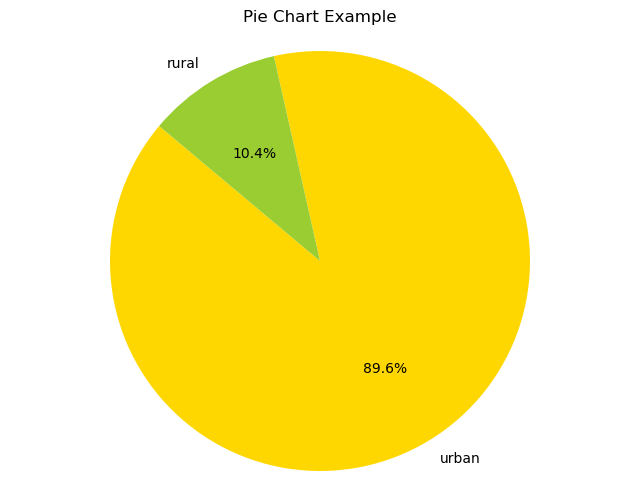

In [10]:
import matplotlib.pyplot as plt

# Data to plot
colors = ['gold', 'yellowgreen']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(insurance_details.AccidentArea.value_counts(),  labels=["urban","rural"], colors=colors, autopct='%1.1f%%',  startangle=140)

plt.title('Pie Chart Example')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


most of the insurance is made by urban people

In [11]:
insurance_details.MonthClaimed.value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64

top month claiming for insurance is january this myt be ramdom or accident myt occur much in jan bcoz of waether conditions

<Axes: xlabel='Sex', ylabel='count'>

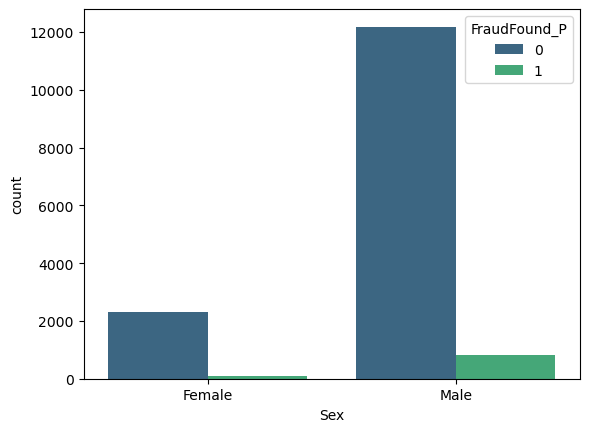

In [12]:
sns.countplot( data=insurance_details,x="Sex",hue="FraudFound_P", palette="viridis")


as we can see above most of the fraud cases are from male and most insurance are made by men 

In [13]:
insurance_details.Fault.value_counts()

Fault
Policy Holder    11230
Third Party       4190
Name: count, dtype: int64

<Axes: xlabel='Fault', ylabel='count'>

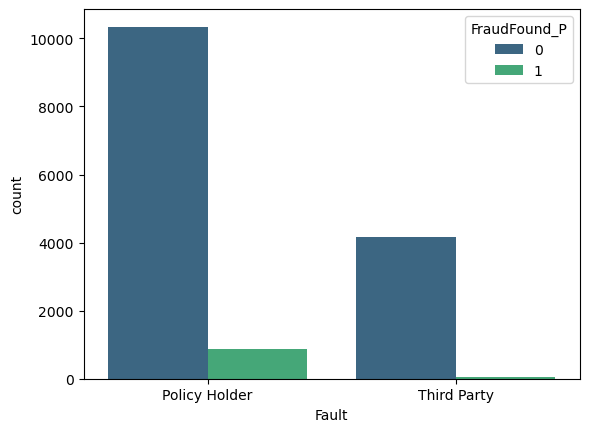

In [14]:
sns.countplot( data=insurance_details,x="Fault",hue="FraudFound_P", palette="viridis")


so it clearly states most of the fraud case are from policy holder

In [15]:
insurance_details.PolicyType.value_counts()

PolicyType
Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: count, dtype: int64

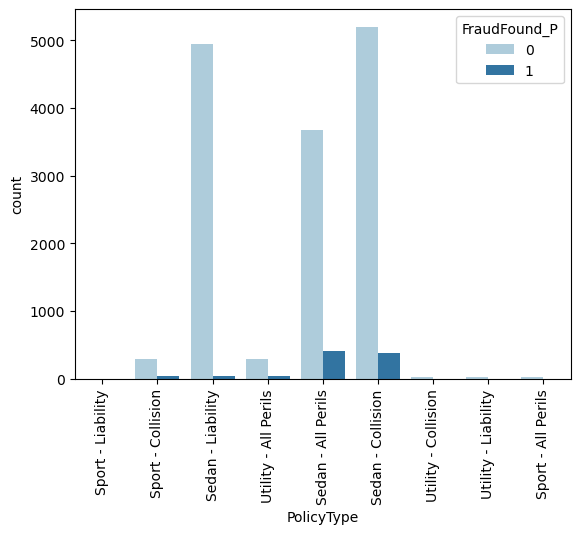

In [16]:
sns.countplot( data=insurance_details,x="PolicyType",hue="FraudFound_P", palette="Paired")
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='VehicleCategory', ylabel='count'>

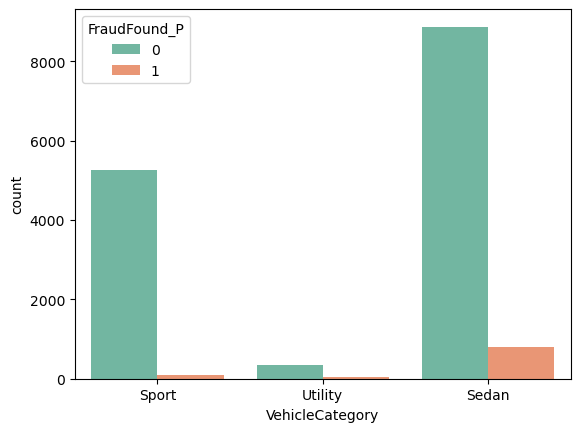

In [17]:
sns.countplot( data=insurance_details,x="VehicleCategory",hue="FraudFound_P", palette="Set2")


In [18]:
insurance_details.VehiclePrice.value_counts()

VehiclePrice
20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
60000 to 69000       87
Name: count, dtype: int64

In [19]:
insurance_details.groupby(by="VehiclePrice")["FraudFound_P"].sum().sort_values(ascending=False)

VehiclePrice
20000 to 29000     421
more than 69000    189
30000 to 39000     175
less than 20000    103
40000 to 59000      31
60000 to 69000       4
Name: FraudFound_P, dtype: int64

so most of the frauds happening of vehicles ranging from 20000 to 29000


In [20]:
insurance_details.groupby(by="DriverRating")["FraudFound_P"].sum().sort_values(ascending=False)

DriverRating
3    242
4    235
1    232
2    214
Name: FraudFound_P, dtype: int64

<Axes: xlabel='PastNumberOfClaims', ylabel='count'>

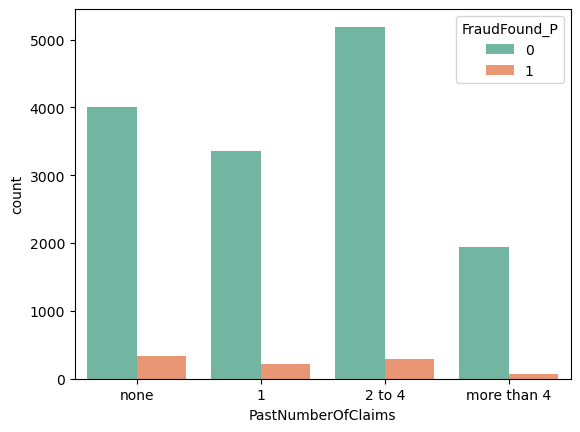

In [21]:
sns.countplot( data=insurance_details,x="PastNumberOfClaims",hue="FraudFound_P", palette="Set2")


<Axes: xlabel='PoliceReportFiled', ylabel='count'>

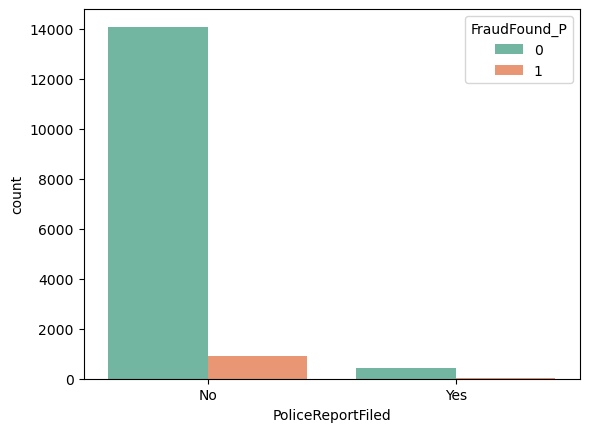

In [22]:
sns.countplot( data=insurance_details,x="PoliceReportFiled",hue="FraudFound_P", palette="Set2")


so as we can see most of the fraud cases happened which were not  police complained

<Axes: xlabel='WitnessPresent', ylabel='count'>

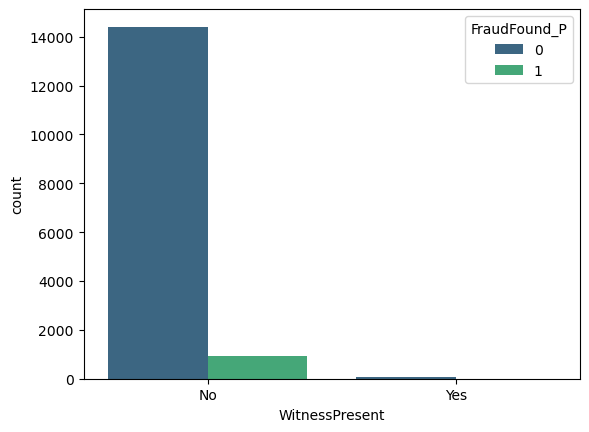

In [23]:
sns.countplot( data=insurance_details,x="WitnessPresent",hue="FraudFound_P", palette="viridis")


In [24]:
#sns.pairplot(insurance_details)


feature selection 

so to understand which variable impacts on target

In [25]:
insurance_details1=insurance_details.copy()

In [26]:
insurance_details1

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

scaler = MinMaxScaler() 
insurance_details1[['WeekOfMonth', 'WeekOfMonthClaimed', 'DriverRating']] = scaler.fit_transform(insurance_details1[['WeekOfMonth', 'WeekOfMonthClaimed', 'DriverRating']])
scaler = StandardScaler()
insurance_details1[['Age', 'Deductible', 'Year',]] = scaler.fit_transform(insurance_details1[['Age', 'Deductible', 'Year']])


<Axes: >

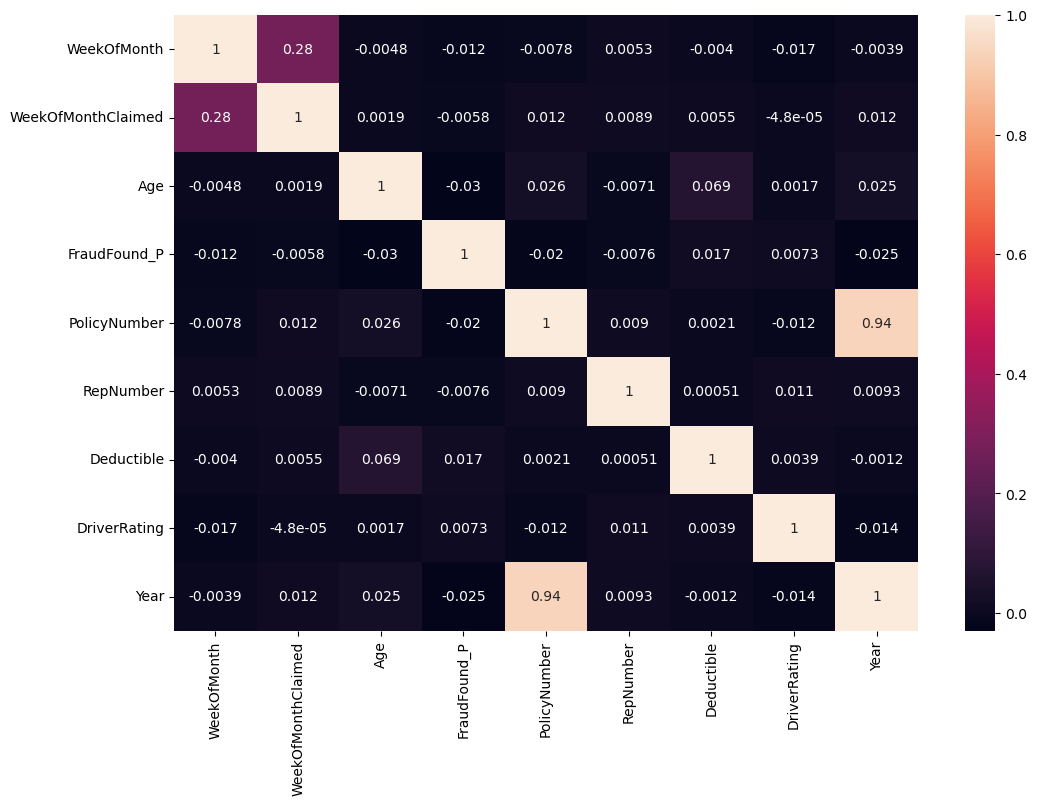

In [28]:
num_cols = insurance_details1.select_dtypes(include = 'number').columns.tolist()
plt.figure(figsize = (12,8))
sns.heatmap(insurance_details1[num_cols].corr(),annot = True)


In [29]:
temp = insurance_details1.select_dtypes(include = 'object').columns.tolist()
temp=temp+["FraudFound_P"]
temp

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy',
 'FraudFound_P']

In [30]:
for col in insurance_details1.select_dtypes(include=["object"]).columns:
    insurance_details1[col]=LabelEncoder().fit_transform(insurance_details1[col])
    


<Axes: >

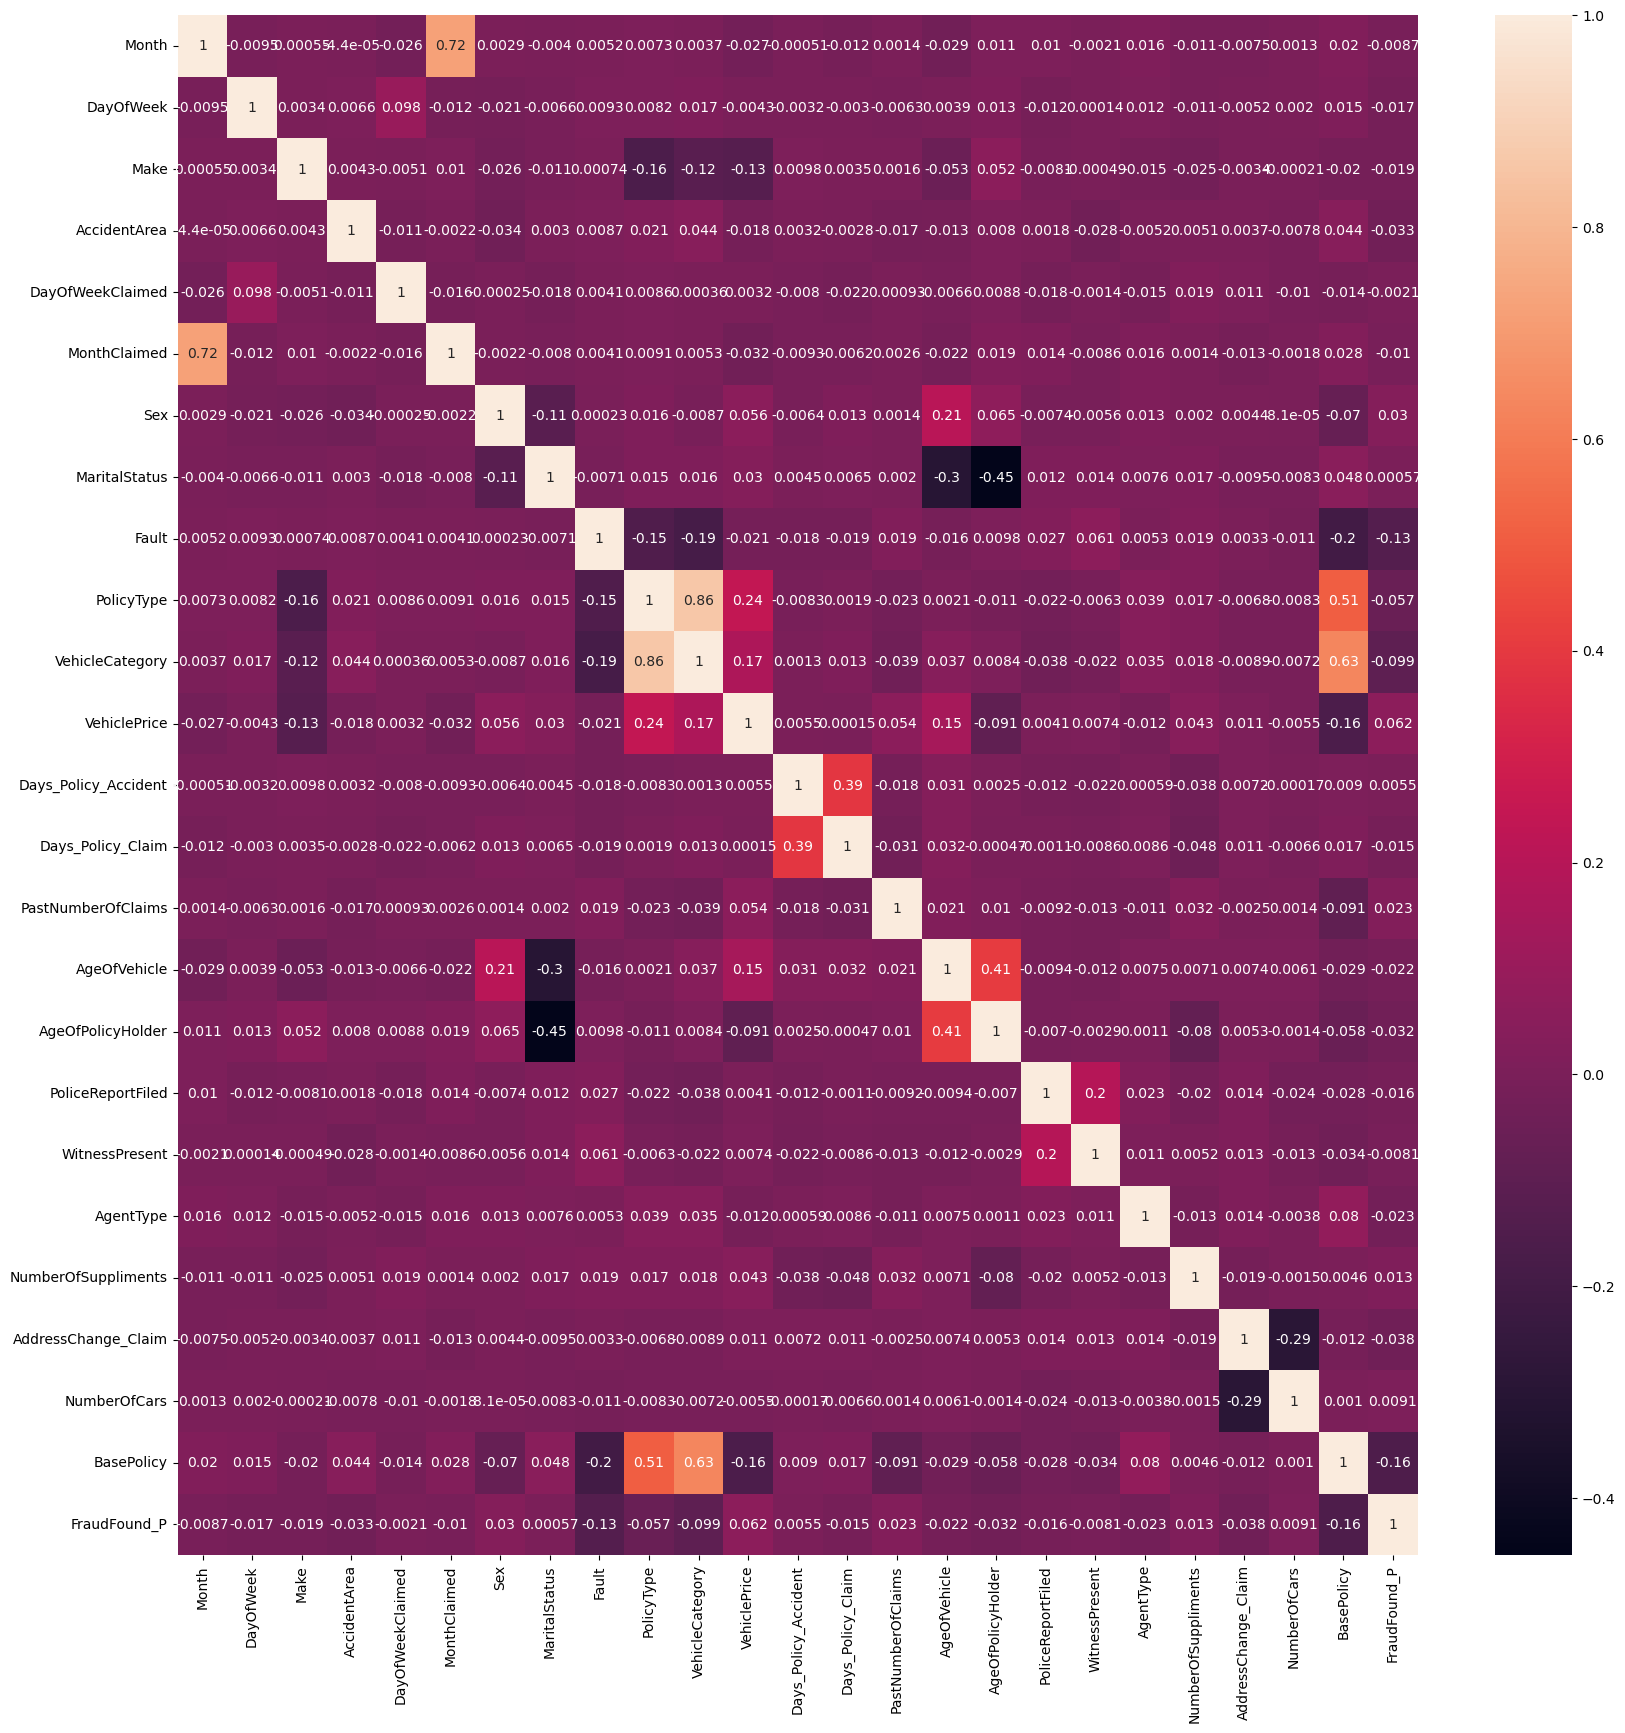

In [31]:
plt.figure(figsize = (20,20))
sns.heatmap(insurance_details1[temp].corr(),annot = True)


In [32]:
df1=insurance_details.copy()

In [33]:
for col in df1.select_dtypes(include=["object"]).columns:
    
    df1[col]=LabelEncoder().fit_transform(df1[col])


In [34]:
scaler = MinMaxScaler() 
df1[['WeekOfMonth', 'WeekOfMonthClaimed', 'DriverRating']] = scaler.fit_transform(df1[['WeekOfMonth', 'WeekOfMonthClaimed', 'DriverRating']])
scaler = StandardScaler()
df1[['Age', 'Deductible', 'Year',]] = scaler.fit_transform(df1[['Age', 'Deductible', 'Year']])


In [35]:
from sklearn.feature_selection import mutual_info_classif

x=df1.drop(columns=["PolicyNumber","RepNumber","FraudFound_P"])
y=df1["FraudFound_P"]

In [36]:
mi_scores=mutual_info_classif(x,y,discrete_features="auto")

In [37]:
mi_scores=pd.Series(mi_scores,index=x.columns)
mi_scores.sort_values(ascending=False,inplace=True)
print(mi_scores)

BasePolicy              0.017734
PolicyType              0.013632
VehicleCategory         0.011133
Fault                   0.008993
AddressChange_Claim     0.006142
WitnessPresent          0.003690
Days_Policy_Accident    0.003457
NumberOfSuppliments     0.003265
Year                    0.003259
Sex                     0.003216
PastNumberOfClaims      0.003057
Make                    0.003009
AgeOfVehicle            0.002512
NumberOfCars            0.002130
WeekOfMonth             0.001880
Month                   0.001819
Days_Policy_Claim       0.001563
VehiclePrice            0.000970
WeekOfMonthClaimed      0.000899
MonthClaimed            0.000781
DayOfWeekClaimed        0.000317
MaritalStatus           0.000200
AgeOfPolicyHolder       0.000149
DriverRating            0.000000
Age                     0.000000
PoliceReportFiled       0.000000
AgentType               0.000000
AccidentArea            0.000000
DayOfWeek               0.000000
Deductible              0.000000
dtype: flo

In [38]:
mi_scores.index

Index(['BasePolicy', 'PolicyType', 'VehicleCategory', 'Fault',
       'AddressChange_Claim', 'WitnessPresent', 'Days_Policy_Accident',
       'NumberOfSuppliments', 'Year', 'Sex', 'PastNumberOfClaims', 'Make',
       'AgeOfVehicle', 'NumberOfCars', 'WeekOfMonth', 'Month',
       'Days_Policy_Claim', 'VehiclePrice', 'WeekOfMonthClaimed',
       'MonthClaimed', 'DayOfWeekClaimed', 'MaritalStatus',
       'AgeOfPolicyHolder', 'DriverRating', 'Age', 'PoliceReportFiled',
       'AgentType', 'AccidentArea', 'DayOfWeek', 'Deductible'],
      dtype='object')

In [39]:
insurance_details_m=insurance_details[['PolicyType', 'BasePolicy', 'VehicleCategory', 'AddressChange_Claim',
       'Fault', 'Days_Policy_Accident', 'AccidentArea', 'Sex', 'Month', 'Age',
       'MaritalStatus', 'AgeOfVehicle', 'WeekOfMonthClaimed', 'MonthClaimed',
       'Make', 'Year', 'PastNumberOfClaims', 'DayOfWeek', 'DayOfWeekClaimed',
       'NumberOfSuppliments', 'AgentType', 'VehiclePrice','FraudFound_P','Deductible']]


Random forest

In [40]:
insurance_details_m.head()

,PolicyType,BasePolicy,VehicleCategory,AddressChange_Claim,Fault,Days_Policy_Accident,AccidentArea,Sex,Month,Age,MaritalStatus,AgeOfVehicle,WeekOfMonthClaimed,MonthClaimed,Make,Year,PastNumberOfClaims,DayOfWeek,DayOfWeekClaimed,NumberOfSuppliments,AgentType,VehiclePrice,FraudFound_P,Deductible
0,Sport - Liability,Liability,Sport,1 year,Policy Holder,more than 30,Urban,Female,Dec,21,Single,3 years,1,Jan,Honda,1994,none,Wednesday,Tuesday,none,External,more than 69000,0,300
1,Sport - Collision,Collision,Sport,no change,Policy Holder,more than 30,Urban,Male,Jan,34,Single,6 years,4,Jan,Honda,1994,none,Wednesday,Monday,none,External,more than 69000,0,400
2,Sport - Collision,Collision,Sport,no change,Policy Holder,more than 30,Urban,Male,Oct,47,Married,7 years,2,Nov,Honda,1994,1,Friday,Thursday,none,External,more than 69000,0,400
3,Sedan - Liability,Liability,Sport,no change,Third Party,more than 30,Rural,Male,Jun,65,Married,more than 7,1,Jul,Toyota,1994,1,Saturday,Friday,more than 5,External,20000 to 29000,0,400
4,Sport - Collision,Collision,Sport,no change,Third Party,more than 30,Urban,Female,Jan,27,Single,5 years,2,Feb,Honda,1994,none,Monday,Tuesday,none,External,more than 69000,0,400


In [41]:
insurance_details_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PolicyType            15420 non-null  object
 1   BasePolicy            15420 non-null  object
 2   VehicleCategory       15420 non-null  object
 3   AddressChange_Claim   15420 non-null  object
 4   Fault                 15420 non-null  object
 5   Days_Policy_Accident  15420 non-null  object
 6   AccidentArea          15420 non-null  object
 7   Sex                   15420 non-null  object
 8   Month                 15420 non-null  object
 9   Age                   15420 non-null  int64 
 10  MaritalStatus         15420 non-null  object
 11  AgeOfVehicle          15420 non-null  object
 12  WeekOfMonthClaimed    15420 non-null  int64 
 13  MonthClaimed          15420 non-null  object
 14  Make                  15420 non-null  object
 15  Year                  15420 non-null

In [42]:
from sklearn.model_selection import train_test_split
X = insurance_details_m.drop(['FraudFound_P'],axis = 1)
y = insurance_details_m['FraudFound_P']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [43]:
temp1=insurance_details_m.select_dtypes(include = 'object').columns.tolist()
temp1

['PolicyType',
 'BasePolicy',
 'VehicleCategory',
 'AddressChange_Claim',
 'Fault',
 'Days_Policy_Accident',
 'AccidentArea',
 'Sex',
 'Month',
 'MaritalStatus',
 'AgeOfVehicle',
 'MonthClaimed',
 'Make',
 'PastNumberOfClaims',
 'DayOfWeek',
 'DayOfWeekClaimed',
 'NumberOfSuppliments',
 'AgentType',
 'VehiclePrice']

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False),temp1)
])

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)


In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote,y_train_smote = smote.fit_resample(X_train_trf,y_train)

In [46]:
y_train.value_counts()


FraudFound_P
0    9715
1     616
Name: count, dtype: int64

In [47]:
y_train_smote.value_counts()


FraudFound_P
0    9715
1    9715
Name: count, dtype: int64

In [48]:
from sklearn.svm import SVC

 Create the SVC model
svc_model = SVC(kernel='linear')

#Train the model
svc_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_svc = svc_model.predict(X_test_trf)

# Model evaluation
print("SVC Model Evaluation:")
print(f"Test Accuracy: {svc_model.score(X_test_trf, y_test)}")
print(classification_report(y_test, y_pred_svc))

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the model and use .ravel() on the "y_train" data.
rf_model.fit(X_train_smote, y_train_smote)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_trf)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results

# Model evaluation
print("RandomForest Model Evaluation:")
print(f"RandomForest Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

RandomForest Model Evaluation:
RandomForest Accuracy Score : 0.9390842994694439
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4782
           1       0.38      0.02      0.03       307

    accuracy                           0.94      5089
   macro avg       0.66      0.51      0.50      5089
weighted avg       0.91      0.94      0.91      5089



In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training data
knn_model.fit(X_train_smote, y_train_smote)

# Create predictions using the testing data
y_pred = knn_model.predict(X_test_trf)


# Model evaluation
print("KNN Model Evaluation:")
print('KNN Test Acc: %.3f' % knn_model.score(X_test_trf, y_test))

# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

KNN Model Evaluation:
KNN Test Acc: 0.714
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      4782
           1       0.11      0.52      0.18       307

    accuracy                           0.71      5089
   macro avg       0.53      0.63      0.50      5089
weighted avg       0.91      0.71      0.79      5089



In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,learning_rate=0.7,random_state=42)
ada_clf.fit(X_train_smote, y_train_smote)
y_pred = ada_clf.predict(X_test_trf)
print("test accuracy:",accuracy_score(y_test,y_pred))

print(classification_report(y_test, y_pred))

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


test accuracy: 0.9143250147376695
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4782
           1       0.20      0.14      0.17       307

    accuracy                           0.91      5089
   macro avg       0.57      0.55      0.56      5089
weighted avg       0.90      0.91      0.91      5089



In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
model_gbm = GradientBoostingClassifier(n_estimators=2000,
                                       learning_rate=0.01,
                                       max_depth=3,
                                       subsample=0.7,
                                       validation_fraction=0.1,
                                       n_iter_no_change=10,
                                       max_features='sqrt',
                                       verbose=1)
model_gbm.fit(X_train_smote, y_train_smote)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3825           0.0038            1.05m
         2           1.3788           0.0038           47.24s
         3           1.3750           0.0032           49.94s
         4           1.3701           0.0053           50.40s
         5           1.3635           0.0063           46.83s
         6           1.3596           0.0047           46.85s
         7           1.3555           0.0028           47.05s
         8           1.3537           0.0023           43.19s
         9           1.3500           0.0039           46.53s
        10           1.3466           0.0030           46.76s
        20           1.3105           0.0024           43.27s
        30           1.2779           0.0064           42.93s
        40           1.2428          -0.0001           42.52s
        50           1.2122          -0.0022           42.11s
        60           1.1835           0.0013           41.25s
       

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           n_estimators=2000, n_iter_no_change=10,
                           subsample=0.7, verbose=1)

In [53]:
#y_pred = model_gbm.predict(X_test_trf)
y_train_mod=model_gbm.predict(X_train_smote)
y_test_pred=model_gbm.predict(X_test_trf)

In [54]:
print("train accuracy:",accuracy_score(y_train_smote,y_train_mod))
print("test accuracy:",accuracy_score(y_test,y_pred))


train accuracy: 0.9677817807514153
test accuracy: 0.9143250147376695


In [55]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(learning_rate=0.01,
                                      max_depth=5,
                                      n_estimators=1000,
                                      subsample=0.7,
                                      colsample_bytree=0.7,
                                      verbosity=1)


model_xgboost.fit(X_train_smote, y_train_smote)
                    


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
y_train_pred = model_xgboost.predict(X_train_smote)
y_test_pred = model_xgboost.predict(X_test_trf)
print("train accuracy:",accuracy_score(y_train_smote,y_train_pred))
print("test accuracy:",accuracy_score(y_test,y_test_pred))
y_prob_xgb = model_xgboost.predict_proba(X_test_trf)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(roc_auc_xgb)


train accuracy: 0.9684508492022645
test accuracy: 0.9388877972096679
0.8247557684421902


In [57]:
y_prob_xgb = model_xgboost.predict_proba(X_test_trf)[:, 1]
print(y_prob_xgb)

[0.07710012 0.0236716  0.2692331  ... 0.23723042 0.01401568 0.13763131]


C:\Users\anush\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3824           0.0040           23.09s
         2           1.3783           0.0040           43.35s
         3           1.3745           0.0037           39.31s
         4           1.3679           0.0071           45.20s
         5           1.3639           0.0031           43.53s
         6           1.3603           0.0037           43.73s
         7           1.3563           0.0037           43.73s
         8           1.3529           0.0042           40.63s
         9           1.3491           0.0039           43.02s
        10           1.3459           0.0039           43.80s
        20           1.3154           0.0019           42.59s
        30           1.2748           0.0002           41.37s
        40           1.2434          -0.0016           41.14s
        50           1.2207           0.0028           41.09s
        60           1.1934           0.0010           40.91s
       

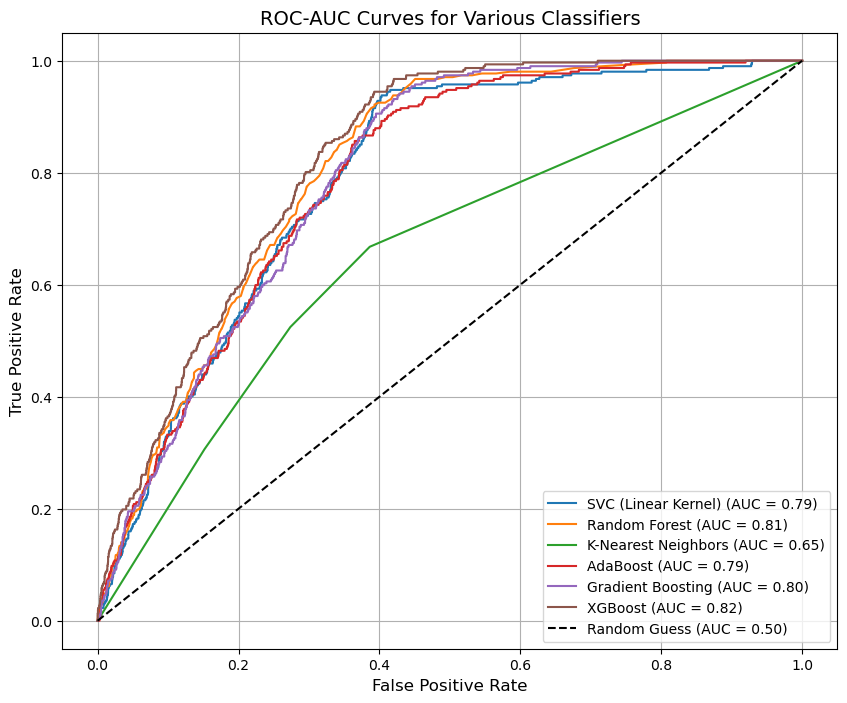

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification


classifiers = {
    "SVC (Linear Kernel)": SVC(probability=True, kernel="linear", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,learning_rate=0.7,random_state=42),

    "Gradient Boosting": GradientBoostingClassifier(n_estimators=2000,learning_rate=0.01,max_depth=3,subsample=0.7,validation_fraction=0.1,n_iter_no_change=10,max_features='sqrt',verbose=1),
    "XGBoost":XGBClassifier(learning_rate=0.01,max_depth=5,n_estimators=1000,subsample=0.7,colsample_bytree=0.7,verbosity=1)

}

# 3. Train models and plot ROC-AUC curves
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    
    # Train the model
    clf.fit(X_train_smote, y_train_smote)
    # Get predicted probabilities for the positive class
    y_pred_proba = clf.predict_proba(X_test_trf)[:, 1]
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

                            
                            
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.title("ROC-AUC Curves for Various Classifiers", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()



In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# added
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback

# added
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)


# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(128, input_dim=X_train_smote.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping_callback])
# try decreasing the batch size


# Make predictions on the test set
y_pred_prob = model.predict(X_test_trf)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)




C:\Users\anush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7185 - loss: 0.5171 - val_accuracy: 0.7643 - val_loss: 0.5423
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8542 - loss: 0.3307 - val_accuracy: 0.8999 - val_loss: 0.3171
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9273 - loss: 0.1981 - val_accuracy: 0.9341 - val_loss: 0.2121
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9540 - loss: 0.1319 - val_accuracy: 0.9900 - val_loss: 0.0553
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9682 - loss: 0.0930 - val_accuracy: 0.9722 - val_loss: 0.1035
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9757 - loss: 0.0716 - val_accuracy: 0.9565 - val_loss: 0.1285
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9841 - loss: 0.0504 - val_accuracy: 0.9959 - val_loss: 0.0322
Epoch 8/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9872 - loss: 0.0423 - val_accuracy: 0.

In [60]:
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Confusion Matrix:
 [[4601  181]
 [ 274   33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      4782
           1       0.15      0.11      0.13       307

    accuracy                           0.91      5089
   macro avg       0.55      0.53      0.54      5089
weighted avg       0.90      0.91      0.90      5089

